## Cargamos Drive

In [1]:
from google.colab import drive

In [2]:
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Pasamos las imágenes por el modelo

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import pickle

# Crear una lista de todas las rutas de archivo de imagen en la carpeta de imágenes
image_paths = [os.path.join('/content/drive/MyDrive/Apple', f) for f in os.listdir('/content/drive/MyDrive/Apple') if f.endswith('.png')]


In [9]:
# Cargar la red VGG16 pre-entrenada
vgg_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

# Obtener las características de la imagen usando la red VGG19
def get_image_features(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.vgg19.preprocess_input(x)
    features = vgg_model.predict(x)
    return features.flatten()

image_features = []
for image_path in image_paths:
    features = get_image_features(image_path)
    image_features.append(features)
    print(image_path.strip(".gif").strip("C:/content/drive/MyDrive/Apple"))




80134624/80134624 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 1s 1s/step
245.
1/1 [==============================] - 1s 668ms/step
1616.
1/1 [==============================] - 1s 1s/step
1642.
1/1 [==============================] - 1s 1s/step
1757.
1/1 [==============================] - 1s 896ms/step
1708.
1/1 [==============================] - 1s 658ms/step
1696.
1/1 [==============================] - 1s 660ms/step
234.
1/1 [==============================] - 1s 663ms/step
1630.
1/1 [==============================] - 1s 673ms/step
257.
1/1 [==============================] - 1s 662ms/step
1622.
1/1 [==============================] - 1s 674ms/step
1800.
1/1 [==============================] - 1s 672ms/step
196.
1/1 [==============================] - 1s 659ms/step
179.
1/1 [==============================] - 1s 662ms/step
284.
1/1 [==============================] - 1s 841ms/step
249.
1/1 [==============================] - 1s 1s/step
239.
1/1 [==============================] - 1s 1s/step
1599.
1/1 [===============

In [10]:
df = pd.DataFrame(image_features)

In [11]:
imagen1 = ""

for i in image_features[0]:
  imagen1 = imagen1 + str(i) + ", "

In [12]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.0,0.0,0.0,7.659648,0.0,0.00000,0.0,0.0,0.0,...,10.157165,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,13.226464,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,12.493546,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.614087,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,11.266401,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2.479859,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,12.107126,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,11.107081,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.0,14.625174,0.0,0.00000,0.0,0.0,0.0,...,16.666903,0.0,0.0,0.181932,2.504313,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,11.069907,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2.963130,0.0
8,0.0,0.0,0.0,0.0,4.179685,0.0,0.47537,0.0,0.0,0.0,...,3.358038,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,11.351887,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [13]:
# Guardar la lista en un archivo
with open("/content/drive/MyDrive/características_imagenesvgg19.pickle", "wb") as file:
    pickle.dump(image_features, file)

## 2. Cargamos los dos modelos

In [9]:
from sklearn.neighbors import NearestNeighbors
import pickle
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd

with open("/content/drive/MyDrive/características_imagenesvgg19.pickle", "rb") as file:
  image_features19 = pickle.load(file)

vgg_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

nn_index19 = NearestNeighbors(n_neighbors=10, metric='cosine')
nn_index19.fit(image_features19)

image_paths = [os.path.join('/content/drive/MyDrive/Apple', f) for f in os.listdir('/content/drive/MyDrive/Apple') if f.endswith('.png')]

80134624/80134624 [==============================] - 1s 0us/step


In [10]:
def get_image_features(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.vgg19.preprocess_input(x)
    features = vgg_model.predict(x)
    return features.flatten()

## EJEMPLOS

In [11]:
corazon = '134'
familia = '500'
malabarista = '455'
animal = '543'
rombo = '1540'
cantante = '300'
chica = '250'

persona = 'test_persona.jpg'
rosa = 'Rosa.png'


In [60]:
# input_path = f'/content/drive/MyDrive/Apple/{cantante}.png'

In [75]:
input_path = f'/content/drive/MyDrive/Test Trasno emojis/{rosa}'

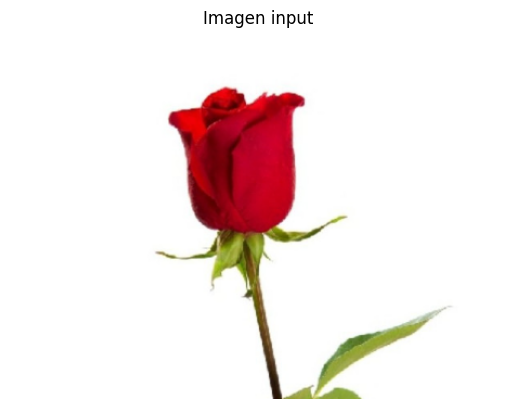

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

img = mpimg.imread(input_path)

plt.imshow(img)
plt.title("Imagen input")
plt.axis('off')
plt.show()

## 3. Pasamos la imagen input por el modelo

In [77]:
input = get_image_features(input_path)

1/1 [==============================] - 1s 623ms/step


In [78]:
input

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Comparamos el vector de la imagen input con todos los de la base de datos mediante KNN

In [79]:
  distances, indices = nn_index19.kneighbors([input], n_neighbors=10)
  similar_images = [image_paths[i] for i in indices.flatten()]

In [80]:
similar_images

['/content/drive/MyDrive/Apple/636.png',
 '/content/drive/MyDrive/Apple/647.png',
 '/content/drive/MyDrive/Apple/645.png',
 '/content/drive/MyDrive/Apple/631.png',
 '/content/drive/MyDrive/Apple/1092.png',
 '/content/drive/MyDrive/Apple/383.png',
 '/content/drive/MyDrive/Apple/387.png',
 '/content/drive/MyDrive/Apple/401.png',
 '/content/drive/MyDrive/Apple/1102.png',
 '/content/drive/MyDrive/Apple/982.png']

## 5. RESULTADO

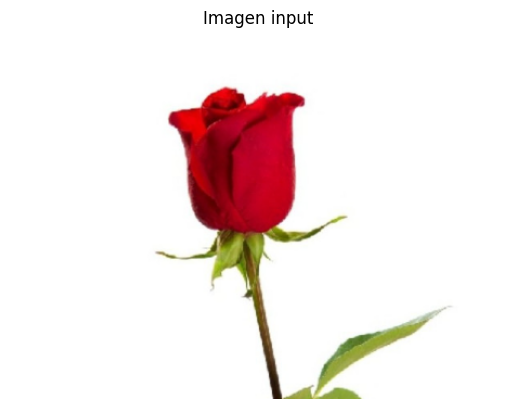

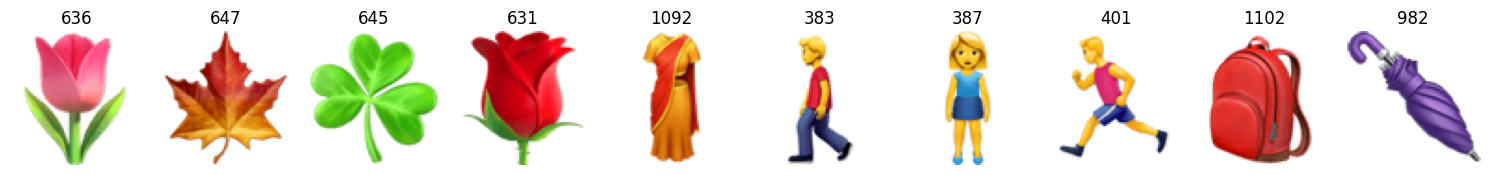

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

img = mpimg.imread(input_path)

plt.imshow(img)
plt.title("Imagen input")
plt.axis('off')
plt.show()



fig, axes = plt.subplots(1, len(similar_images), figsize=(15, 5))

for i, img_path in enumerate(similar_images):

    img = mpimg.imread(img_path)

    axes[i].imshow(img)
    axes[i].set_title(img_path.strip("/content/drive/MyDrive/Apple/").strip(".png"))
    axes[i].axis('off')

plt.tight_layout()
plt.show()
